In [1]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()
#LS means contents of a list

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
im3_path = threes[1]
im3 = Image.open(im3_path)

In [3]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[1:10,4:22])
df.style.set_properties(**{'font-size':'8pt'}).background_gradient('Blues')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
5,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
6,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
7,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
8,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0


In [4]:
seven_tensors = [tensor(Image.open(i)) for i in sevens]
three_tensors = [tensor(Image.open(g)) for g in sevens]

In [5]:
len(seven_tensors), len(three_tensors )
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

mean3 = stacked_threes.mean(0) #along z-axis
mean7 = stacked_sevens.mean(0)

In [6]:
a_3 = stacked_threes[15]
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.0899), tensor(0.1771))

In [7]:
valid_3_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls() ])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls() ])
valid_7_tens = valid_7_tens.float()/255

/opt/conda/envs/fastai/lib/python3.8/site-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729096996/work/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


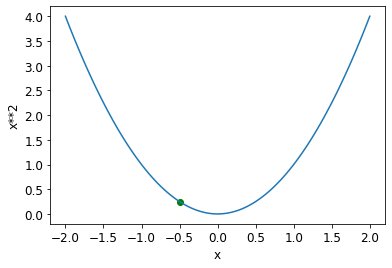

In [8]:
def f(x): return x**2
plot_function(f,'x','x**2')
plt.scatter(-0.5, f(-0.5), color = 'green')

In [9]:
xt = tensor(4.).requires_grad_()
yt = f(xt)
print(yt)
yt.backward()
print(yt)
xt.grad

tensor(16., grad_fn=<PowBackward0>)
tensor(16., grad_fn=<PowBackward0>)


tensor(8.)

In [10]:
xt = tensor([1., 4, 11,]).requires_grad_()
xt

tensor([ 1.,  4., 11.], requires_grad=True)

In [11]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(138., grad_fn=<SumBackward0>)

In [12]:
yt.backward()
xt.grad

tensor([ 2.,  8., 22.])

In [13]:
time = torch.arange(0,25).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

In [14]:
torch.rand(20), torch.rand(20)*3

(tensor([0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274]),
 tensor([0.8089, 1.3241, 0.8908, 2.4951, 0.3159, 0.8085, 1.0764, 0.5981, 1.6416, 0.0185, 2.8547, 0.2258, 2.6580, 1.7496, 1.0129, 2.4269, 1.7338, 2.7119, 1.6640, 1.0269]))

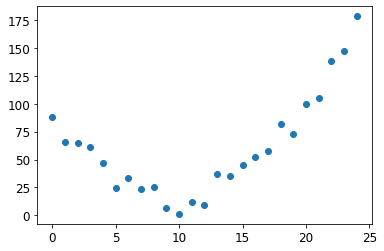

In [15]:
speed = torch.rand(25)*30 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed)

In [16]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

def mse(preds, targets): 
    return ((preds-targets)**2).mean().sqrt()

In [17]:
params = torch.randn(3).requires_grad_()
params #values of a, b, c aa gaye random

tensor([ 0.7045,  1.2197, -0.6778], requires_grad=True)

In [18]:
preds = f(time,params)
preds, len(preds)

(tensor([ -0.6778,   1.2465,   4.5798,   9.3223,  15.4739,  23.0345,  32.0042,  42.3830,  54.1710,  67.3680,  81.9741,  97.9892, 115.4135, 134.2469, 154.4893, 176.1409, 199.2015, 223.6712, 249.5500,
         276.8379, 305.5349, 335.6410, 367.1562, 400.0804, 434.4138], grad_fn=<AddBackward0>),
 25)

In [19]:
def show_preds(preds, ax = None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds), color = 'red')
    ax.set_ylim(-50,100)

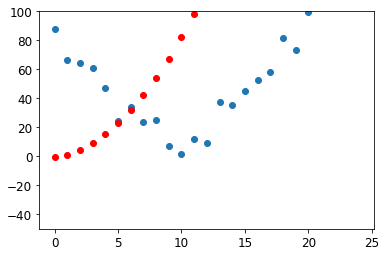

In [20]:
show_preds(preds)

In [21]:
loss = mse(preds, speed)
loss

tensor(139.4760, grad_fn=<SqrtBackward>)

In [22]:
loss.backward()
params.grad 
# similar to 
# yt.backward()
# xt.grad    

tensor([257.7787,  13.2956,   0.6557])

In [23]:
params.grad * 1e-2 #no need change

tensor([2.5778, 0.1330, 0.0066])

In [24]:
lr = 1e-3
params.data -= params.grad.data*lr
params.grad = None

In [25]:
params.data, params.grad

(tensor([ 0.4468,  1.2064, -0.6785]), None)

In [26]:
preds = f(time,params)
mse(preds, speed)
#increased!!!!!!

tensor(74.6905, grad_fn=<SqrtBackward>)

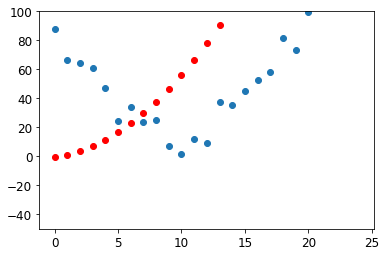

In [27]:
show_preds(preds)

In [28]:
def apply_step(params, prn = True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds    

In [29]:
for i in range(15): apply_step(params)

74.69051361083984
33.685447692871094
33.724185943603516
33.76979064941406
33.82292556762695
33.884124755859375
33.953643798828125
34.03140640258789
34.11688232421875
34.20906066894531
34.30638885498047
34.40688705444336
34.50825881958008
34.60810470581055
34.70412826538086


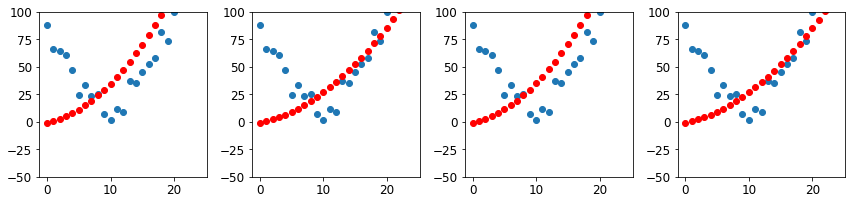

In [32]:
_, axs = plt.subplots(1,4,figsize = (12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

# _,axs = plt.subplots(1,4,figsize=(12,3))
# for ax in axs: show_preds(apply_step(params, False), ax)
# plt.tight_layout()

In [36]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x, train_x.shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([12530, 784]))

In [40]:
#train_y = tensor([1]*len(threes) + [0]*len(sevens))
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y, train_y.shape

(tensor([[1],
         [1],
         [1],
         ...,
         [0],
         [0],
         [0]]),
 torch.Size([12396, 1]))

In [39]:
# train_y = train_y.unsqueeze(1)
# train_y, train_y.shape

(tensor([[[1]],
 
         [[1]],
 
         [[1]],
 
         ...,
 
         [[0]],
 
         [[0]],
 
         [[0]]]),
 torch.Size([12396, 1, 1]))